### Set Up

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns  
from pylab import mpl, plt 

In [182]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [183]:
bova = pd.read_csv('bova11_TA_v1.csv',index_col=0)

In [184]:
bova.head()

,open,high,low,adjusted close,volume,RSI_14,STO_14,CHO,returns
2010-01-04,68.55,69.45,68.30,69.37,168379,NaN,NaN,NaN,NaN
2010-01-05,69.46,70.03,69.32,69.90,179175,NaN,NaN,NaN,0.007640
2010-01-06,69.74,70.32,69.70,70.30,187683,NaN,NaN,NaN,0.005722
2010-01-07,69.52,70.13,69.52,70.00,105126,NaN,NaN,NaN,-0.004267
2010-01-08,69.41,70.00,69.31,69.48,177077,NaN,NaN,NaN,-0.007429


In [185]:
bova = bova.rename(columns={"adjusted close": "adj_close","returns": "return"}) 

### Creatimg  new features

In [186]:
#Close price of N day before
'''
bova['5d_close']= bova['adj_close'].shift(5)
bova['10d_close']= bova['adj_close'].shift(10)
bova['15d_close']= bova['adj_close'].shift(15)
'''

"\nbova['5d_close']= bova['adj_close'].shift(5)\nbova['10d_close']= bova['adj_close'].shift(10)\nbova['15d_close']= bova['adj_close'].shift(15)\n"

In [187]:
#Rolling volatility of a window  of N days
'''
bova['SD_close_5d']= bova['return'].rolling(5).std()*np.sqrt(252)
bova['SD_close_10d']= bova['return'].rolling(10).std()*np.sqrt(252)
bova['SD_close_15d']= bova['return'].rolling(15).std()*np.sqrt(252)
'''

"\nbova['SD_close_5d']= bova['return'].rolling(5).std()*np.sqrt(252)\nbova['SD_close_10d']= bova['return'].rolling(10).std()*np.sqrt(252)\nbova['SD_close_15d']= bova['return'].rolling(15).std()*np.sqrt(252)\n"

In [188]:
#My goal is to predict if the return on the next day will be positive
bova['Target'] = np.where(bova['return'] > 0 ,1,0)

In [189]:
bova.head()

,open,high,low,adj_close,volume,RSI_14,STO_14,CHO,return,Target
2010-01-04,68.55,69.45,68.30,69.37,168379,NaN,NaN,NaN,NaN,0
2010-01-05,69.46,70.03,69.32,69.90,179175,NaN,NaN,NaN,0.007640,1
2010-01-06,69.74,70.32,69.70,70.30,187683,NaN,NaN,NaN,0.005722,1
2010-01-07,69.52,70.13,69.52,70.00,105126,NaN,NaN,NaN,-0.004267,0
2010-01-08,69.41,70.00,69.31,69.48,177077,NaN,NaN,NaN,-0.007429,0


In [190]:
df = bova.dropna()

In [191]:
df.head()

,open,high,low,adj_close,volume,RSI_14,STO_14,CHO,return,Target
2010-01-22,65.60,65.96,64.91,65.59,653711,26.550868,0.000000,-230526.994114,-0.004704,0
2010-01-26,65.05,65.36,64.12,64.98,457095,24.549947,0.000000,-153660.903303,-0.009300,0
2010-01-27,64.99,65.00,63.90,64.90,444017,24.291395,0.000000,7344.691172,-0.001231,0
2010-01-28,65.06,66.49,63.98,65.20,243961,27.380053,5.882353,70378.105506,0.004622,1
2010-01-29,65.50,65.99,64.70,64.90,129331,26.227741,0.000000,61375.649488,-0.004601,0


In [192]:
df.head()

,open,high,low,adj_close,volume,RSI_14,STO_14,CHO,return,Target
2010-01-22,65.60,65.96,64.91,65.59,653711,26.550868,0.000000,-230526.994114,-0.004704,0
2010-01-26,65.05,65.36,64.12,64.98,457095,24.549947,0.000000,-153660.903303,-0.009300,0
2010-01-27,64.99,65.00,63.90,64.90,444017,24.291395,0.000000,7344.691172,-0.001231,0
2010-01-28,65.06,66.49,63.98,65.20,243961,27.380053,5.882353,70378.105506,0.004622,1
2010-01-29,65.50,65.99,64.70,64.90,129331,26.227741,0.000000,61375.649488,-0.004601,0


In [193]:
# The intention is to predcit if the return in the next day will be positive or not
df['Target'] = df['Target'].shift(-1)

<ipython-input-193-b33f78d9fd7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].shift(-1)


In [194]:
df.head()

,open,high,low,adj_close,volume,RSI_14,STO_14,CHO,return,Target
2010-01-22,65.60,65.96,64.91,65.59,653711,26.550868,0.000000,-230526.994114,-0.004704,0.0
2010-01-26,65.05,65.36,64.12,64.98,457095,24.549947,0.000000,-153660.903303,-0.009300,0.0
2010-01-27,64.99,65.00,63.90,64.90,444017,24.291395,0.000000,7344.691172,-0.001231,1.0
2010-01-28,65.06,66.49,63.98,65.20,243961,27.380053,5.882353,70378.105506,0.004622,0.0
2010-01-29,65.50,65.99,64.70,64.90,129331,26.227741,0.000000,61375.649488,-0.004601,1.0


In [195]:
df = df.dropna(axis=0)

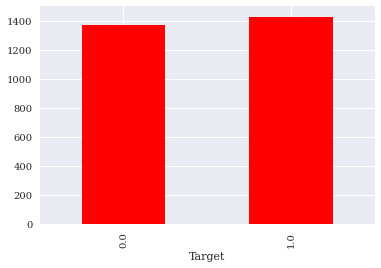

In [233]:
fig = plt.figure()
plot = df.groupby(['Target']).size().plot(kind='bar', color='red')
plt.show()

### EDA


In [238]:
from pandas_profiling import ProfileReport

In [239]:
profile_cr = ProfileReport(df,title="Data Report", dark_mode=True)
# Export it to html file
profile_cr.to_file("data_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


### Splitting data

In [254]:
#features
X =  df.drop('Target',axis=1)
#X = df[['STO_14','CHO',"volume",'return']] #No changes 

In [255]:
#target
y = df["Target"]

In [256]:
train_size = int(0.7 * df.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

### Model implementation

In [257]:
from random import seed
seed(101)

In [258]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [259]:
dt = DecisionTreeClassifier(max_depth=3,random_state=1)

In [260]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [261]:
y_pred = dt.predict(X_test)

In [262]:
accuracy_score(y_test, y_pred)

0.5273159144893111

In [228]:
#MUnbalenced predictions
pd.Series(y_pred).value_counts()

1.0    803
0.0     39
dtype: int64

In [ ]:
pd.Series(y_train).value_counts()

In [ ]:
pd.Series(y_test).value_counts()

Text(0.5, 0, 'Variable Importance')

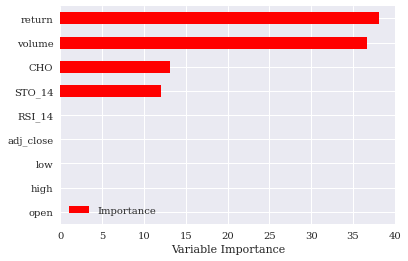

In [252]:
Importance = pd.DataFrame({'Importance':dt.feature_importances_*100},\
index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', \
color='r' )
plt.xlabel('Variable Importance')

## Checking the return of an strategy based on the model decision